<a href="https://colab.research.google.com/github/MeeTK26/30DaysOfMLDL/blob/main/MedicalInsurance(day18).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import pandas as pd

In [18]:
df=pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [19]:
y=df['charges']
df['sex']=df['sex'].map({'male':1,'female':0})
df['smoker']=df['smoker'].map({'yes':1,'no':0})
df['region']=df['region'].map({'southwest':1,'southeast':2,'northwest':3,'northeast':4})

In [20]:
X=np.array(df.drop(['charges'],axis=1))

In [21]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

model=Sequential([
    Dense(128,activation='relu',input_shape=(6,)),
    Dropout(0.2),
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(1,activation='linear')
])
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.fit(X_train,y_train,epochs=100,batch_size=32,validation_split=0.2)

Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 147ms/step - loss: 313918336.0000 - mae: 13234.5488 - val_loss: 310272832.0000 - val_mae: 12652.3203
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 350241056.0000 - mae: 14136.5225 - val_loss: 310076000.0000 - val_mae: 12645.9121
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 285106112.0000 - mae: 12653.2402 - val_loss: 309652896.0000 - val_mae: 12632.8027
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 322097152.0000 - mae: 13518.8779 - val_loss: 308843488.0000 - val_mae: 12608.8740
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 339034944.0000 - mae: 13907.7549 - val_loss: 307455104.0000 - val_mae: 12569.4443
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 281434976.0000 - mae: 12611.2461 - val_loss: 305293344.0000 - val_mae: 12509.6777
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 311019872.0000 - mae: 13141.6826 - val_loss: 302164864.0000 - val_mae: 12425.1602
Epoch 8/100

In [26]:
from sklearn.metrics import r2_score
y_pred=model.predict(X_test)
r2_score(y_test,y_pred)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


0.8046496083936702

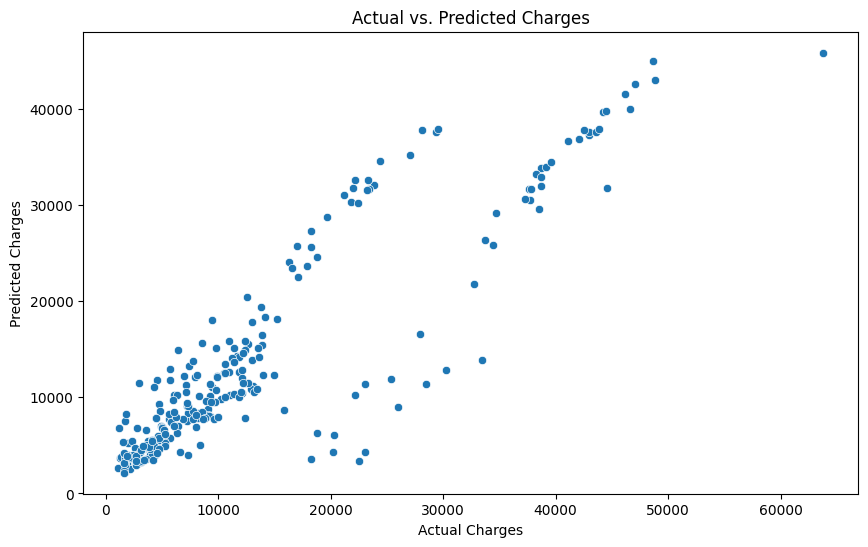

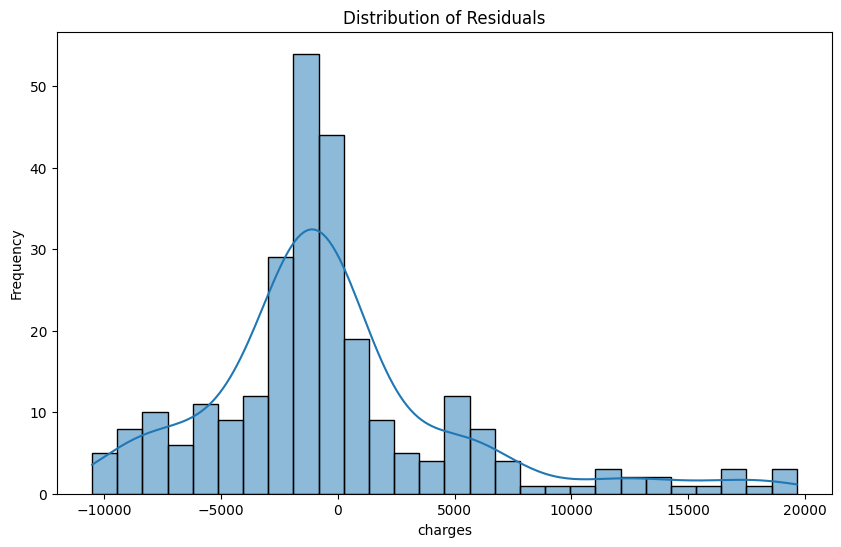

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.scatterplot(x=y_test, y=y_pred.flatten())
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs. Predicted Charges')
plt.show()

plt.figure(figsize=(10, 6))

sns.histplot(y_test - y_pred.flatten(), kde=True)
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()